In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [4]:
studyName = 'eshop' # bcms , crypto, suv

In [5]:
regr_data = pd.read_csv(studyName + '_regressionData.csv')
data_X_train, data_X_test, data_Y_train, data_Y_test =train_test_split(regr_data.drop(['Feature'],axis=1),regr_data['Feature'], test_size=0.2,random_state=43)

reg = LogisticRegression(solver='lbfgs')
pd.options.display.max_rows = None
reg.fit(data_X_train, data_Y_train)
y_pred = reg.predict(data_X_test)

actual = data_Y_test
predicted = y_pred

In [6]:
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))
roc_auc_score(actual, predicted)

Confusion Matrix :
[[26  0]
 [ 4  0]]
Accuracy Score : 0.8666666666666667
Report : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       0.00      0.00      0.00         4

   micro avg       0.87      0.87      0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



C:\Users\anjal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5

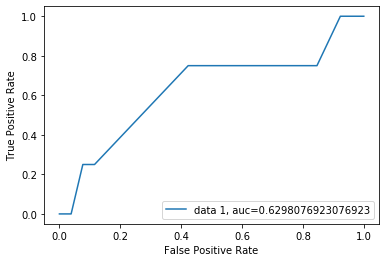

In [8]:
y_pred_proba = reg.predict_proba(data_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(data_Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(data_Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()